In [25]:
import pandas as pd

In [32]:
df = pd.read_csv(
    'methylation-test.bed',
    sep='\t', 
    nrows=10000, 
    na_values=['None']
)
df

,chr,pos,context,samples_called,BUXTON_178_methylated,BUXTON_178_total,WUR_178_methylated,WUR_178_total,BUXTON_169_methylated,BUXTON_169_total,...,WUR_1_methylated,WUR_1_total,BUXTON_2_methylated,BUXTON_2_total,WUR_2_methylated,WUR_2_total,BUXTON_13_methylated,BUXTON_13_total,WUR_13_methylated,WUR_13_total
0,1,1,CHH,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,6,CG,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,6,CHH,52,0.0,1.0,0.0,6.0,0.0,1.0,...,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,7,CHH,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,9,CHH,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,10,CHH,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,11,CHH,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,14,CHH,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,16,CHH,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1,18,CHH,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN


In [33]:
tidy = df.melt(id_vars=['chr', 'pos', 'context', 'samples_called'], var_name='sample', value_name = 'count')

In [44]:
tidy['kind'] = tidy['sample'].str.split('_').str[-1]
tidy['sample'] = tidy['sample'].str.split('_').str[:2].str.join('_')


In [52]:
data = tidy.head(100000000).groupby(['chr', 'pos', 'context', 'samples_called', 'sample', 'kind'])['count'].first().unstack().reset_index()

In [55]:
data['ratio'] = data['methylated'] / data['total']

In [60]:
interesting = data[data['ratio'].between(0.1,1)]

In [66]:
interesting.groupby('sample')['ratio'].median().sort_values(ascending=False)

sample
WUR_99        1.000000
BUXTON_4      1.000000
BUXTON_18     1.000000
BUXTON_19     1.000000
BUXTON_2      1.000000
BUXTON_24     1.000000
BUXTON_29     1.000000
BUXTON_3      1.000000
BUXTON_31     1.000000
BUXTON_35     1.000000
BUXTON_38     1.000000
BUXTON_40     1.000000
BUXTON_177    1.000000
BUXTON_45     1.000000
BUXTON_55     1.000000
BUXTON_59     1.000000
BUXTON_66     1.000000
BUXTON_76     1.000000
BUXTON_9      1.000000
BUXTON_92     1.000000
BUXTON_93     1.000000
BUXTON_96     1.000000
BUXTON_178    1.000000
BUXTON_175    1.000000
WUR_97        1.000000
BUXTON_13     1.000000
BUXTON_100    1.000000
BUXTON_101    1.000000
BUXTON_102    1.000000
BUXTON_105    1.000000
                ...   
WUR_9         1.000000
WUR_92        1.000000
WUR_93        1.000000
WUR_96        1.000000
WUR_100       1.000000
WUR_177       1.000000
WUR_169       1.000000
WUR_165       1.000000
WUR_101       1.000000
WUR_102       1.000000
WUR_105       1.000000
WUR_110       1.000000
WUR_

In [85]:
interesting[interesting['chr'].isin([2,81,101])]

kind,chr,pos,context,samples_called,sample,methylated,total,ratio
11233,2,9,CHH,29,BUXTON_100,1.0,1.0,1.000000
11243,2,9,CHH,29,BUXTON_131,2.0,2.0,1.000000
11251,2,9,CHH,29,BUXTON_157,1.0,1.0,1.000000
11254,2,9,CHH,29,BUXTON_169,1.0,1.0,1.000000
11255,2,9,CHH,29,BUXTON_175,1.0,2.0,0.500000
11264,2,9,CHH,29,BUXTON_31,1.0,1.0,1.000000
11266,2,9,CHH,29,BUXTON_38,1.0,1.0,1.000000
11279,2,9,CHH,29,BUXTON_99,1.0,1.0,1.000000
11283,2,9,CHH,29,WUR_102,1.0,1.0,1.000000
11289,2,9,CHH,29,WUR_120,1.0,1.0,1.000000


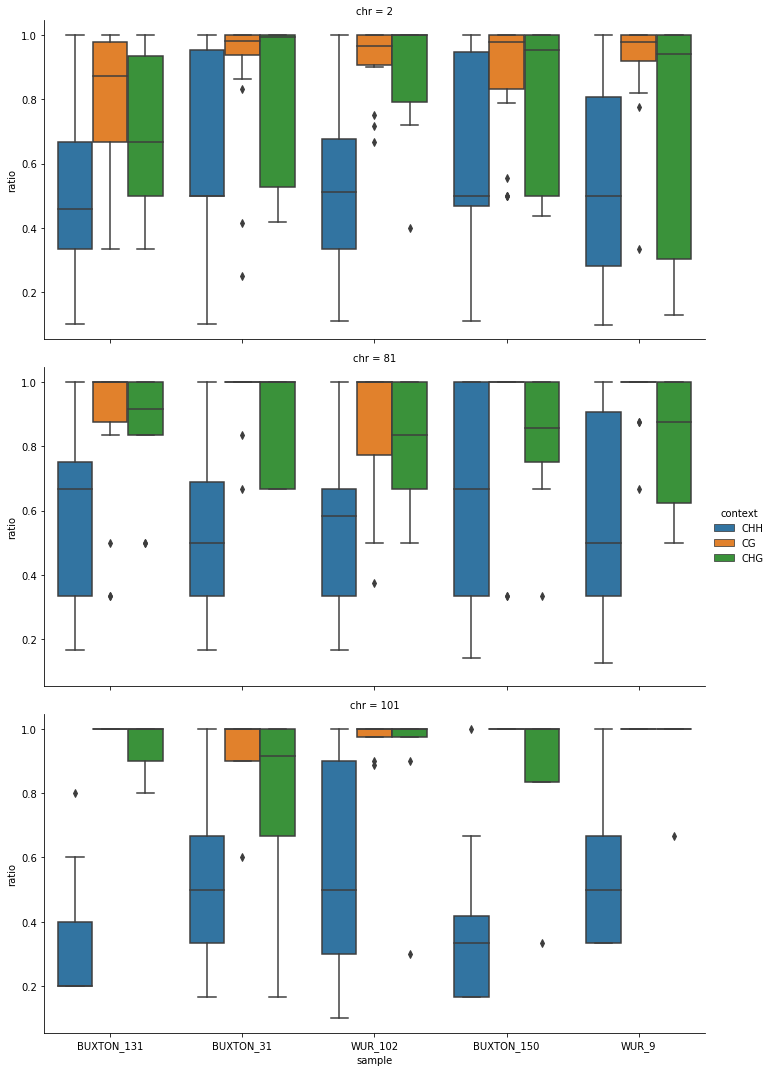

In [93]:
import seaborn as sns
%matplotlib inline

sns.catplot(
    data = interesting[interesting['chr'].isin([2,81,101])].groupby('sample').filter(lambda x : len(x) > 175),
    x = 'sample',
    y = 'ratio',
    kind='box',
    aspect = 2,
    hue = 'context',
    row ='chr'
)

In [96]:
interesting['ratio'] * 100

138        14.285714
193        14.285714
203        12.500000
208        14.285714
221        20.000000
224        33.333333
226       100.000000
231        10.000000
269        20.000000
378       100.000000
474       100.000000
525       100.000000
570       100.000000
587       100.000000
621       100.000000
666       100.000000
668       100.000000
940       100.000000
971       100.000000
1036      100.000000
1067      100.000000
1098      100.000000
1101      100.000000
1132      100.000000
1146      100.000000
1148      100.000000
1186      100.000000
1194       14.285714
1242       10.000000
1547      100.000000
             ...    
959938     16.666667
959940    100.000000
959943     50.000000
959945    100.000000
959946    100.000000
959947     40.000000
959948     33.333333
959949     50.000000
959950     62.500000
959955     22.222222
959966     25.000000
959967     75.000000
959968     33.333333
959970    100.000000
959973     33.333333
959975     66.666667
959976     33